<a href="https://colab.research.google.com/github/smartpenguin25/SA-25/blob/main/dynamic_parking_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy VehicleType  \
0   0      BHMBCCMKT01       577  26.144536  91.736172         61         car   
1   1      BHMBCCMKT01       577  26.144536  91.736172         64         car   
2   2      BHMBCCMKT01       577  26.144536  91.736172         80         car   
3   3      BHMBCCMKT01       577  26.144536  91.736172        107         car   
4   4      BHMBCCMKT01       577  26.144536  91.736172        150        bike   

  TrafficConditionNearby  QueueLength  IsSpecialDay LastUpdatedDate  \
0                    low            1             0      04-10-2016   
1                    low            1             0      04-10-2016   
2                    low            2             0      04-10-2016   
3                    low            2             0      04-10-2016   
4                    low            2             0      04-10-2016   

  LastUpdatedTime  
0        07:59:00  
1        08:25:00  
2        08:59:00  
3     

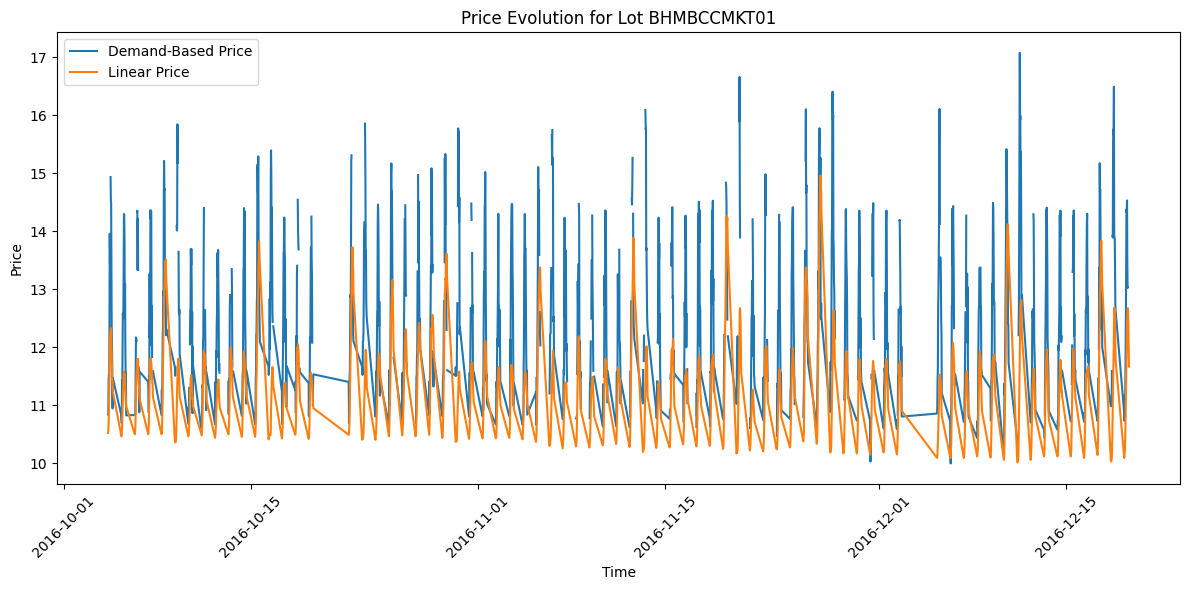

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('dataset.csv')
# Load the dataset
df = pd.read_csv('dataset.csv')

# View the first few rows
print(df.head())

# Check column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())
# Example: Fill missing values with 0
df = df.fillna(0)

# If you have a time column, convert it
# df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df.columns)
df.columns = df.columns.str.strip()
df['occupancy_ratio'] = df['Occupancy'] / df['Capacity']
# Set base price and alpha
base_price = 10
alpha = 5  # Controls sensitivity

# Calculate linear price
df['linear_price'] = base_price + alpha * df['occupancy_ratio']

# Optional: Clip price to reasonable bounds
df['linear_price'] = df['linear_price'].clip(lower=5, upper=20)
# Assign weights to vehicle types (adjust as needed)
vehicle_weights = {'car': 0.05, 'bike': 0, 'truck': 0.1}
df['vehicle_weight'] = df['VehicleType'].map(vehicle_weights)
# Map traffic conditions to numbers
traffic_map = {'low': 0, 'average': 0.5, 'high': 1}
df['traffic_level'] = df['TrafficConditionNearby'].map(traffic_map)

# Ensure isSpecialDay is numeric (0 or 1)
df['is_special_day'] = df['IsSpecialDay'].astype(int)
df['occupancy_ratio'] = df['Occupancy'] / df['Capacity']

df['demand'] = (
    0.5 * df['occupancy_ratio'] +
    0.2 * df['QueueLength'] +
    -0.1 * df['traffic_level'] +
    0.1 * df['is_special_day'] +
    df['vehicle_weight']
)
df['norm_demand'] = (df['demand'] - df['demand'].min()) / (df['demand'].max() - df['demand'].min())
base_price = 10  # Set your base price
lam = 1          # Sensitivity parameter; adjust as needed

df['demand_price'] = base_price * (1 + lam * df['norm_demand'])
df['demand_price'] = df['demand_price'].clip(lower=5, upper=20)
print(df[['Occupancy', 'Capacity', 'QueueLength', 'TrafficConditionNearby', 'IsSpecialDay', 'VehicleType', 'demand_price']].head())
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], dayfirst=True)
# Use SystemCodeNumber for LotID and the new Timestamp column
sample_lot_id = df['SystemCodeNumber'].unique()[0]
sample = df[df['SystemCodeNumber'] == sample_lot_id]

plt.figure(figsize=(12,6))
plt.plot(sample['Timestamp'], sample['demand_price'], label='Demand-Based Price')
if 'linear_price' in sample.columns:
    plt.plot(sample['Timestamp'], sample['linear_price'], label='Linear Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'Price Evolution for Lot {sample_lot_id}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()











